## define the function

In [1]:
# let's get some 1 minute bar data using alphavantage.co
# register for an APIKEY at alphavantage.co
# NOTE: you must set outputsize = full in your url otherwise you get truncated data
# SOURCE: https://www.alphavantage.co/

import pandas as pd
import io
import requests

# TODO: replace with your own API key
apikey = "G9X6PNM9DW17K47X"

# get daily stock prices
def getDailyStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(columns = ['timestamp'])
    return symbol_df

# get minute stock prices
def getMinuteStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&interval=1min&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(['timestamp'], axis= 1)
    return symbol_df

# get minute stock prices
def getLatestStockPrice(symbol):
    url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=' + symbol + '&apikey=' + apikey + '&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    return symbol_df['price'].values[0]


## download data of stock

In [2]:
symbol = 'MSFT'
history_data_MSFT_1min = getMinuteStockPrices(symbol)
print(type(history_data_MSFT_1min))

<class 'pandas.core.frame.DataFrame'>


## data processing

In [4]:
chart_date = '2019-03-25'
history_data_MSFT_1min_chart_date = history_data_MSFT_1min[chart_date]
history_data_MSFT_1min_chart_date.head(3)

,open,high,low,close,volume
timestamp,,,,,
2019-03-25 09:31:00,116.560,116.67,116.340,116.60,858114
2019-03-25 09:32:00,116.590,116.70,116.330,116.35,154066
2019-03-25 09:33:00,116.345,116.78,116.345,116.74,114600


## draw picture of price and volume of the stock

Text(0.5, 1.0, "Microsoft's stock minute price")

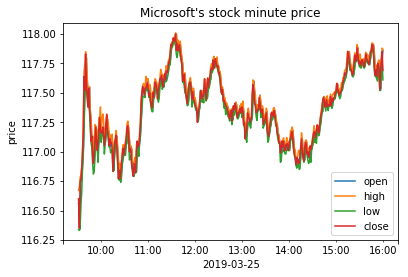

In [14]:
import matplotlib.pyplot as plt
history_data_MSFT_1min_chart_date.plot(y = ['open', 'high', 'low', 'close'], kind='line')
plt.ylabel('price')
plt.xlabel(chart_date)
plt.title("Microsoft's stock minute price")
#plt.show()

Text(0.5, 1.0, "Microsoft's stock minute volume")

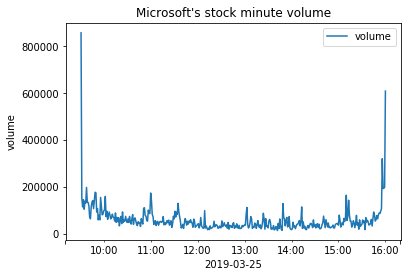

In [15]:
history_data_MSFT_1min_chart_date.plot(y = 'volume', kind='line')
plt.ylabel('volume')
plt.xlabel(chart_date)
plt.title("Microsoft's stock minute volume")
#plt.show()

##  calculate and display summary descriptive statistics

In [18]:
import numpy as np
history_data_MSFT_1min_chart_date_describe = history_data_MSFT_1min_chart_date.describe()
history_data_MSFT_1min_chart_date_describe

,open,high,low,close,volume
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,117.373173,117.420926,117.325727,117.375692,59243.943590
std,0.299807,0.290314,0.306615,0.296506,61455.798081
min,116.345000,116.670000,116.330000,116.350000,13668.000000
25%,117.130000,117.180000,117.072500,117.130000,31810.500000
50%,117.382500,117.420000,117.350000,117.385000,46904.500000
75%,117.600000,117.645025,117.550000,117.608750,68694.250000
max,118.000000,118.010000,117.950000,118.000000,858114.000000


In [21]:
history_data_MSFT_1min_totle_volume_chart_date = np.sum(history_data_MSFT_1min_chart_date['volume'])
history_data_MSFT_1min_totle_amount_chart_date = np.sum(history_data_MSFT_1min_chart_date['volume'] * history_data_MSFT_1min_chart_date['close'])
history_data_MSFT_1min_vwap_chart_date = history_data_MSFT_1min_totle_amount_chart_date / history_data_MSFT_1min_totle_volume_chart_date
print("Totle volume of Microsoft's stock for "+chart_date+" is %hf" % history_data_MSFT_1min_totle_volume_chart_date)
print("Volume Weighted Average Price of Microsoft's stock for "+chart_date+" is %hf" % history_data_MSFT_1min_vwap_chart_date)

Totle volume of Microsoft's stock for 2019-03-25 is 23105138.000000
Volume Weighted Average Price of Microsoft's stock for 2019-03-25 is 117.356062
